<a href="https://colab.research.google.com/github/AnderDev085/LIA/blob/main/IA_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score,confusion_matrix, classification_report)

In [ ]:
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df["target"] = iris.target
df["target_name"] = df["target"].map(dict(enumerate(iris.target_names)))
df



,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


In [ ]:
X = df[iris.feature_names]
y = df["target"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [ ]:
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [ ]:
print("\nResultados obtidos para k = 4:")
print("                              Acurácia:", accuracy_score(y_test, y_pred))
print("                              Recall:", recall_score(y_test, y_pred, average="macro"))
print("                              Precisão:", precision_score(y_test, y_pred, average="macro"))
print("                              F1-score:", f1_score(y_test, y_pred, average="macro"))


Resultados obtidos para k = 4:
                              Acurácia: 0.9555555555555556
                              Recall: 0.9555555555555556
                              Precisão: 0.9607843137254902
                              F1-score: 0.9553571428571429


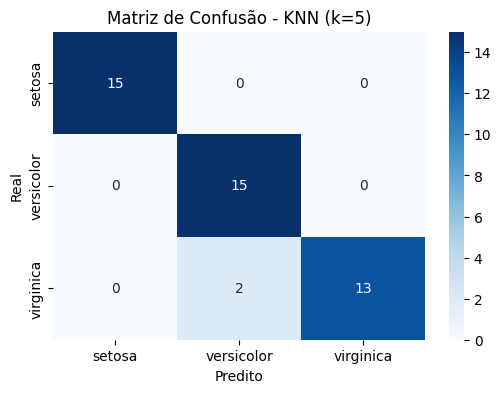

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.title("Matriz de Confusão - KNN (k=5)")
plt.xlabel("Predito")
plt.ylabel("Real")
plt.show()

In [ ]:
valoresK = range(1, 11)
acuracias = []

for k in valoresK:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    y_pred_k = model.predict(X_test)
    acuracias.append(accuracy_score(y_test, y_pred_k))

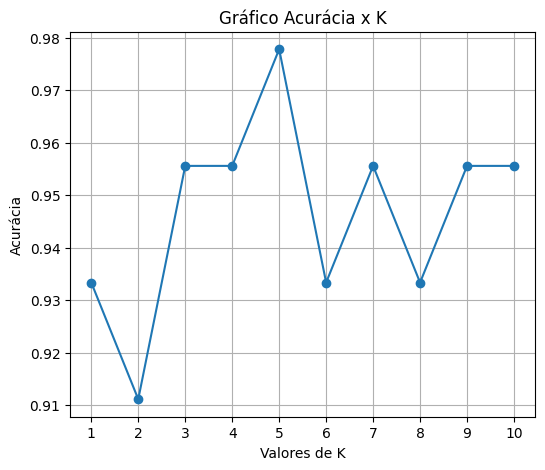

In [ ]:
plt.figure(figsize=(6,5))
plt.plot(valoresK, acuracias, marker='o')
plt.title("Gráfico Acurácia x K")
plt.xlabel("Valores de K")
plt.ylabel("Acurácia")
plt.xticks(valoresK)
plt.grid(True)
plt.show()

In [ ]:
param_grid = {"n_neighbors": range(1, 11)}
grid = GridSearchCV(
    KNeighborsClassifier(),
    param_grid,
    cv=5,
    scoring="accuracy"
)
grid.fit(X, y)

print("Melhor valor de k :", grid.best_params_)

best_k = grid.best_params_["n_neighbors"]

Melhor valor de k : {'n_neighbors': 6}


In [ ]:
accuracies_30 = []
for seed in range(30):
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=seed, stratify=y
    )
    model = KNeighborsClassifier(n_neighbors=best_k)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracies_30.append(accuracy_score(y_test, y_pred))

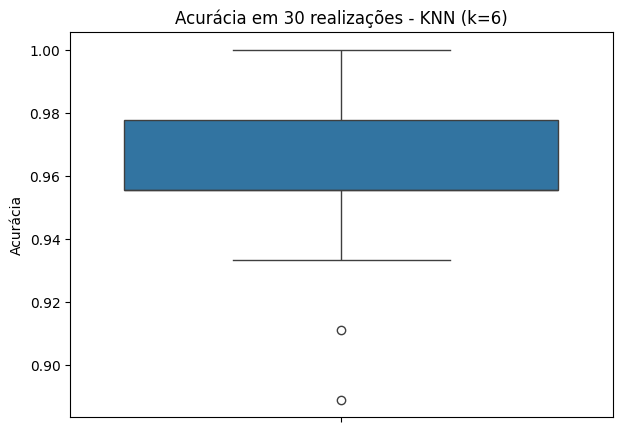

In [ ]:
plt.figure(figsize=(7,5))
sns.boxplot(accuracies_30)
plt.title(f"Acurácia em 30 realizações - KNN (k={best_k})")
plt.ylabel("Acurácia")
plt.show()